In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as sched

In [2]:
def get_learning_rate(step_num):
    lr = 0.001
    if step_num < 1000:
        lr *= math.log(step_num + 1.) / math.log(1000 - 1.)

    return lr

In [3]:
model = nn.Linear(2, 2)

In [4]:
optimizer = optim.Adam(model.parameters(), 1., betas=(.9, .98), eps=1e-9)

In [5]:
scheduler = sched.LambdaLR(optimizer, lambda s: (104**(-.5)) *
                           min((s+1e-9)**(-.5), s*(4000**(-1.5)))
                           )  # Vaswani

In [6]:
scheduler = sched.LambdaLR(optimizer, lambda s: 0.001*math.log(s+1)/math.log(1000-1)
                           if s < 1000 else 0.001)  # Chute

In [7]:
for i in range(5):  # Check if LR is updated correctly
    scheduler.step(i)
    for param_group in optimizer.param_groups:
        print(param_group['lr'])

0.0
0.00010035786744633398
0.0001590634565547838
0.00020071573489266795
0.00023302375196662466


In [8]:
chris = [get_learning_rate(i) for i in range(2000)]

In [9]:
chris2 = [0.001*math.log(i+1)/math.log(1000-1)
                           if i < 1000 else 0.001 for i in range(2000)]

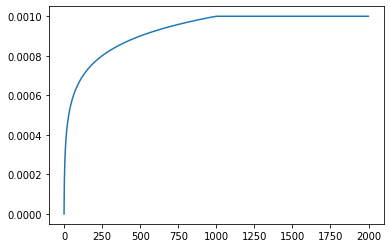

In [11]:
plt.plot(list(range(2000)), chris)

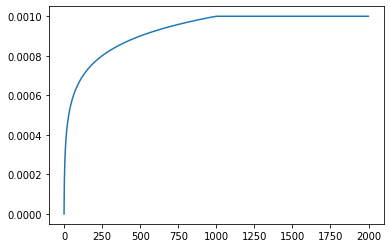

In [12]:
plt.plot(list(range(2000)), chris2)

In [13]:
f = lambda x,t: x**(-.5)*np.minimum(t**(-.5), t*(2000**(-1.5)))

In [14]:
y = f(104, np.arange(4000))

/home/rnd/miniconda3/envs/squad/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


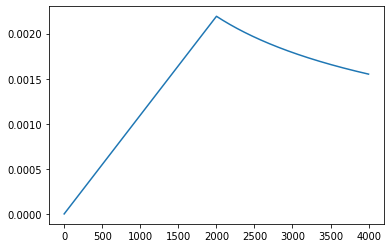

In [15]:
plt.plot(list(range(4000)), y)